In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from epiweeks import Week
import matplotlib.pyplot as plt
from scipy.special import inv_boxcox 

# Definir a cor das bordas (spines) como cinza
mpl.rcParams['axes.edgecolor'] = 'gray'

# Definir a cor das linhas dos ticks maiores e menores como cinza
mpl.rcParams['xtick.color'] = 'gray'
mpl.rcParams['ytick.color'] = 'gray'
mpl.rcParams['xtick.labelcolor'] = 'black'
mpl.rcParams['ytick.labelcolor'] = 'black'

In [2]:
def add_epiweek_label(df_w):
    '''
    This function assumes that the dataframe has a datetime index
    and add the epiweek and year value
    '''

    df_w['epiweek_label'] = [Week.fromdate(x) for x in df_w.date]

    df_w['epiweek_label'] = df_w['epiweek_label'].astype(str)

    df_w = df_w.loc[df_w.epiweek_label.str[-2:].astype(int) != 53]

    df_w['epiweek'] = df_w['epiweek_label'].astype(str).str[-2:].astype(int)
    df_w['year'] = df_w['epiweek_label'].astype(str).str[:4].astype(int)

    return df_w

In [3]:
state = 'RJ'

In [4]:
FILENAME_DATA = f'../data/dengue_{state}.csv.gz'

In [5]:
df_for = pd.read_csv(f'./forecast_tables/for_{state}.csv', index_col ='Unnamed: 0')

df_for.date = pd.to_datetime(df_for.date)

df_for

,date,lower_2_5,lower_25,forecast,upper_75,upper_97_5
0,2024-09-22,132.153491,241.485149,319.617157,412.548698,827.286603
1,2024-09-29,143.475799,229.240589,300.529312,398.862869,660.373860
2,2024-10-06,126.312499,200.259743,292.529053,405.303719,590.674950


In [6]:
df_ens = pd.read_csv('ensemble_bayes_2025.csv.gz')

df_ens = df_ens.loc[df_ens.state == state]

df_ens.date = pd.to_datetime(df_ens.date)

df_ens = df_ens.loc[df_ens.date <= '2024-11-03']

df_ens.head()

,date,pred_ensemble_23,lower_ensemble_23,upper_ensemble_23,mean_ensemble_23,sd_ensemble_23,pred_ensemble_24,lower_ensemble_24,upper_ensemble_24,mean_ensemble_24,sd_ensemble_24,state
520,2024-10-06,791.680299,334.319983,1874.723999,6.674158,0.524095,1946.980546,436.209379,8690.169054,7.574035,0.909450,RJ
521,2024-10-13,861.267036,373.131869,1987.985938,6.758405,0.508539,2078.195790,464.181948,9304.320777,7.639255,0.911314,RJ
522,2024-10-20,896.614388,390.780767,2057.208103,6.798626,0.504895,2230.194135,498.108960,9985.296952,7.709844,0.911343,RJ
523,2024-10-27,942.569768,422.153448,2104.537513,6.848610,0.488336,2393.411543,535.120338,10704.917018,7.780475,0.910709,RJ
524,2024-11-03,1123.670798,520.898617,2423.957410,7.024356,0.467398,2294.549197,521.428511,10097.177096,7.738292,0.900821,RJ


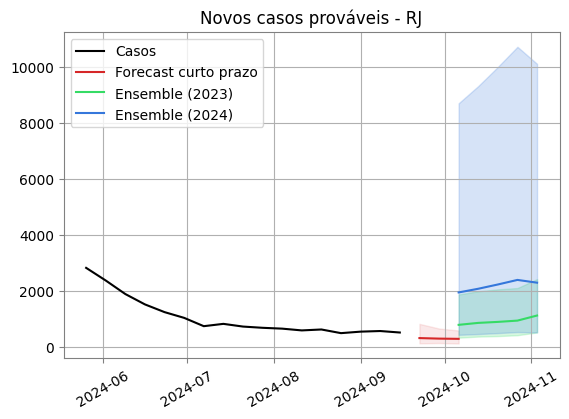

In [7]:
df = pd.read_csv(FILENAME_DATA, index_col = 'date')
df.index = pd.to_datetime(df.index)
df.casos = inv_boxcox(df.casos, 0.05) - 1
    

fig,ax = plt.subplots()

df_ = df.loc[(df.index >= '2024-05-26')]

ax.plot(df_.index, df_.casos, color = 'black', label = 'Casos')

ax.plot(df_for.date,  df_for.forecast, color = 'tab:red', label = 'Forecast curto prazo')

ax.fill_between(df_for.date, df_for.lower_2_5, df_for.upper_97_5, color = 'tab:red', alpha = 0.1)


ax.plot(df_ens.date, df_ens.pred_ensemble_23, color = '#35DB65', label = 'Ensemble (2023)')
    
ax.fill_between(df_ens.date, df_ens.lower_ensemble_23, df_ens.upper_ensemble_23, color = '#35DB65', alpha = 0.2)
    
ax.plot(df_ens.date, df_ens.pred_ensemble_24, color = '#3577DB', label = 'Ensemble (2024)')
        
ax.fill_between(df_ens.date, df_ens.lower_ensemble_24, df_ens.upper_ensemble_24, color = '#3577DB', alpha = 0.2)


ax.legend()
ax.grid()
fig.autofmt_xdate(rotation=30, ha='center')
ax.set_title(f'Novos casos prováveis - {state}')

#plt.savefig(f'./plots/for_{state}.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [8]:
df_for = add_epiweek_label(df_for)

In [9]:
df = pd.read_csv(FILENAME_DATA)
df.date = pd.to_datetime(df.date)
df.casos = inv_boxcox(df.casos, 0.05) - 1

df = add_epiweek_label(df)

df.head()

,date,casos_33001,casos_33002,casos_33003,casos_33004,casos_33005,casos_33006,casos_33007,casos_33008,casos_33009,casos,epiweek,year,epiweek_label
0,2010-01-03,2.736686,5.227933,1.435469,2.736686,4.480695,3.746416,5.641777,4.501992,2.440369,425.0,1,2010,201001
1,2010-01-10,3.231727,4.622888,0.705298,2.973967,4.974738,3.890949,5.659467,4.883493,2.043721,445.0,2,2010,201002
2,2010-01-17,2.736686,4.751009,1.129346,2.043721,4.751009,4.974738,5.501133,5.003797,1.874471,463.0,3,2010,201003
3,2010-01-24,3.231727,5.018089,0.000000,2.973967,5.178508,5.240006,5.018089,5.287234,2.645873,530.0,4,2010,201004
4,2010-01-31,2.899951,5.632844,0.000000,3.342702,5.419632,5.659467,4.583832,5.501133,2.440369,640.0,5,2010,201005


In [10]:
df.dtypes

date             datetime64[ns]
casos_33001             float64
casos_33002             float64
casos_33003             float64
casos_33004             float64
casos_33005             float64
casos_33006             float64
casos_33007             float64
casos_33008             float64
casos_33009             float64
casos                   float64
epiweek                   int64
year                      int64
epiweek_label            object
dtype: object

In [11]:
df_last = df.loc[ (df.epiweek.isin(df_for.epiweek))]
df_last = df_last.loc[df_last.year == 2023]
df_last.head(12)

,date,casos_33001,casos_33002,casos_33003,casos_33004,casos_33005,casos_33006,casos_33007,casos_33008,casos_33009,casos,epiweek,year,epiweek_label
714,2023-09-24,3.746416,3.582953,2.043721,3.538493,6.316054,3.172222,3.043712,3.444477,0.705298,386.0,39,2023,202339
715,2023-10-01,3.625875,4.080705,0.705298,3.492379,6.160854,3.231727,3.707516,3.707516,2.322463,391.0,40,2023,202340
716,2023-10-08,3.707516,3.625875,2.322463,3.989388,6.006485,3.043712,3.109663,3.444477,1.675968,351.0,41,2023,202341


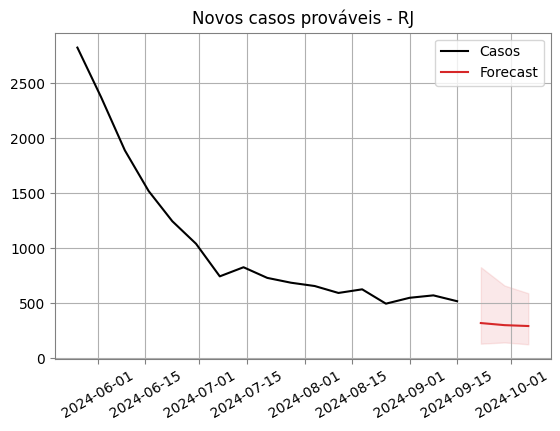

In [13]:

fig,ax = plt.subplots()

df_ = df.loc[(df.date >= '2024-05-26')]

ax.plot(df_.date, df_.casos, color = 'black', label = 'Casos')

#ax.plot(df_for.date, df_last.casos, color = 'tab:blue', label = 'Casos 2023')

ax.plot(df_for.date,  df_for.forecast, color = 'tab:red', label = 'Forecast')

ax.fill_between(df_for.date, df_for.lower_2_5, df_for.upper_97_5, color = 'tab:red', alpha = 0.1)

ax.legend()
ax.grid()
fig.autofmt_xdate(rotation=30, ha='center')
ax.set_title(f'Novos casos prováveis - {state}')

#plt.savefig(f'./plots/for_{state}.png', dpi = 300, bbox_inches = 'tight')

plt.show()

Make this plots for all the states: 

In [14]:
states = ['AL',
 'BA',
 'CE',
 'MA',
 'PB',
 'PE',
 'PI',
 'SE',
 'RN',
 'SP',
 'MG',
 'RJ',
 'ES',
 'AM',
 'AP',
 'TO',
 'RR',
 'RO',
 'AC',
 'PA',
 'DF',
 'GO',
 'MT',
 'MS',
 'RS',
 'SC',
 'PR']

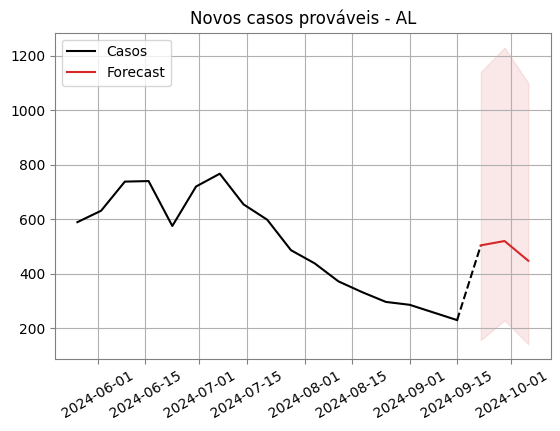

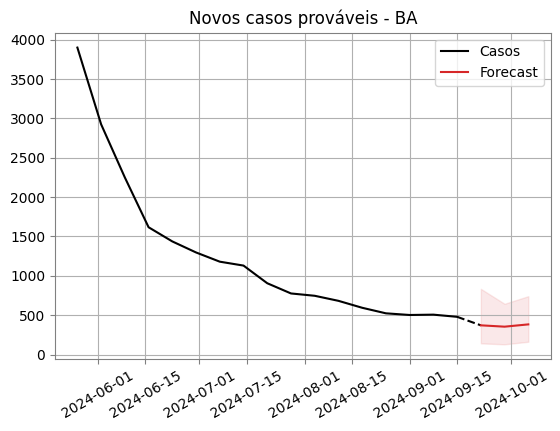

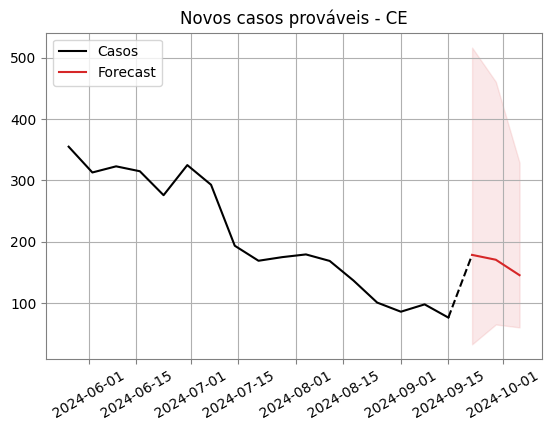

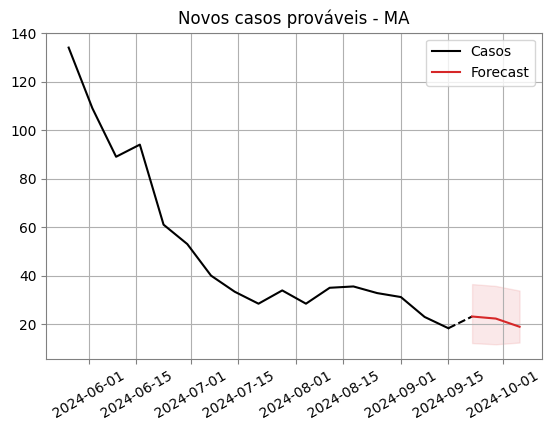

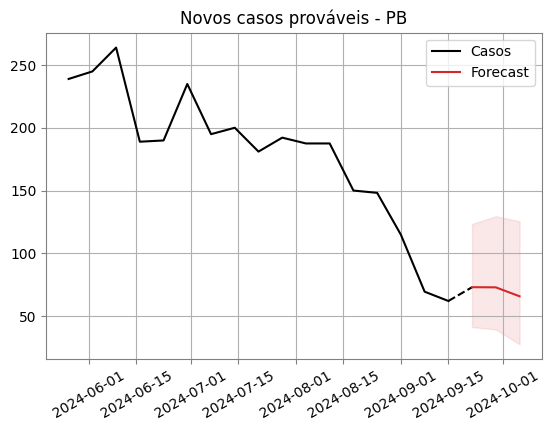

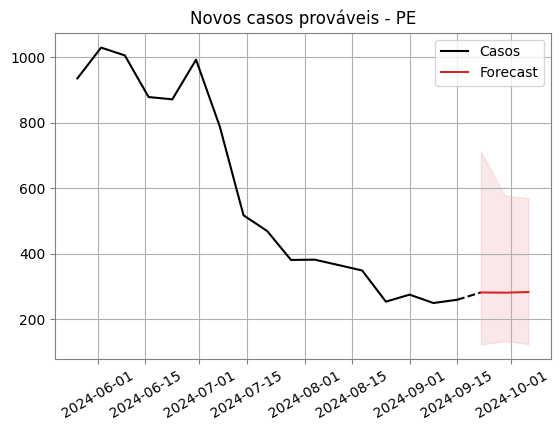

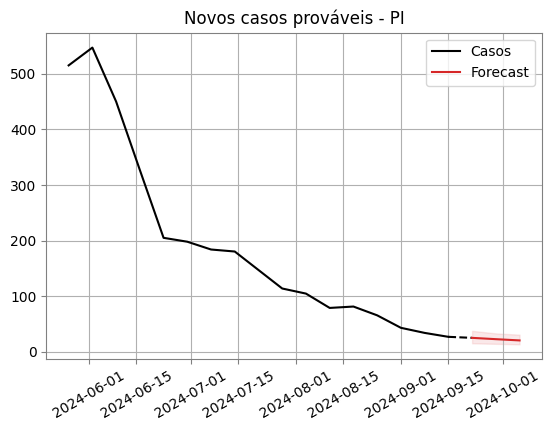

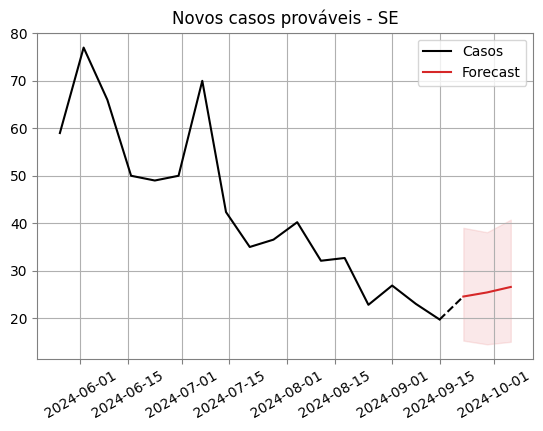

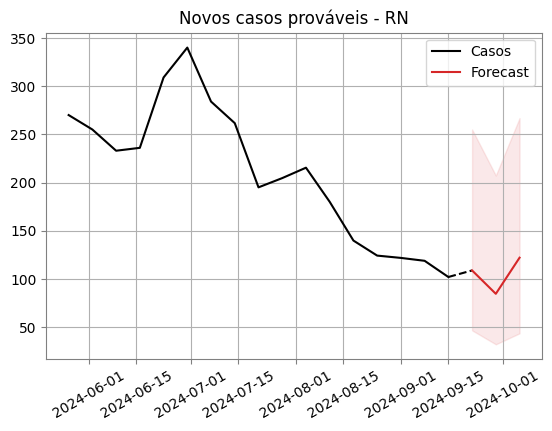

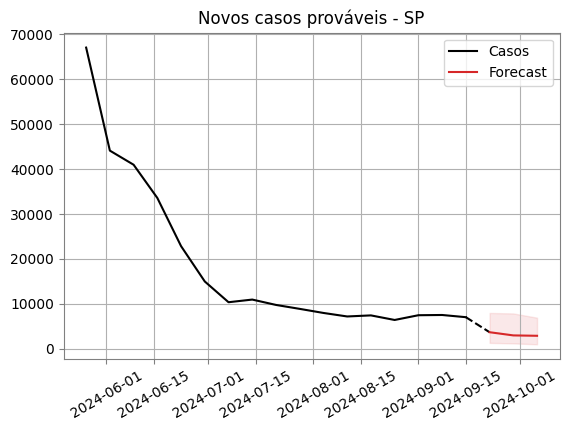

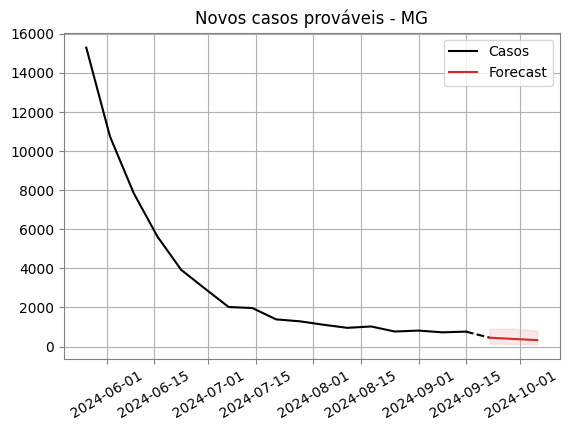

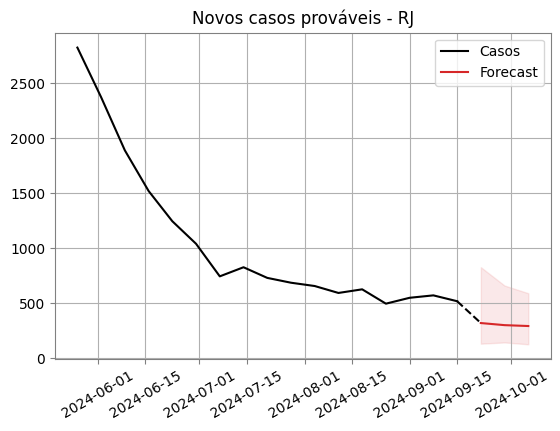

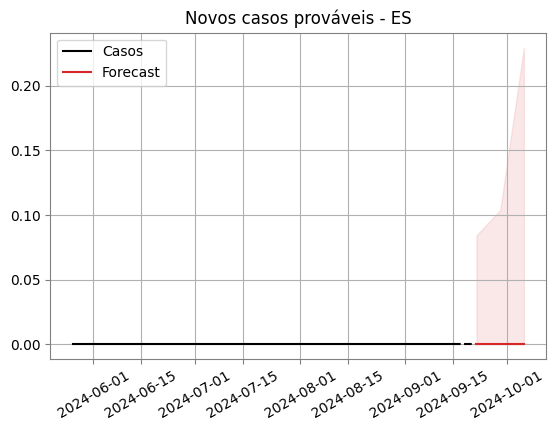

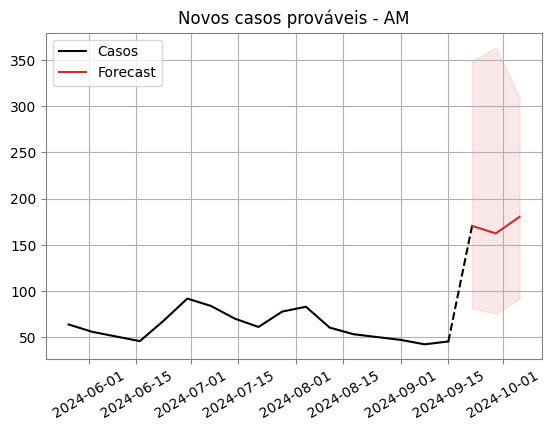

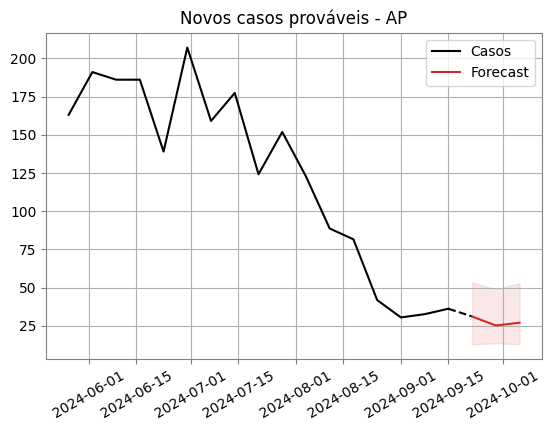

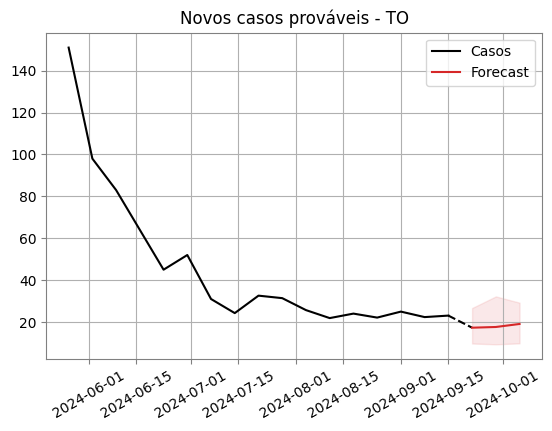

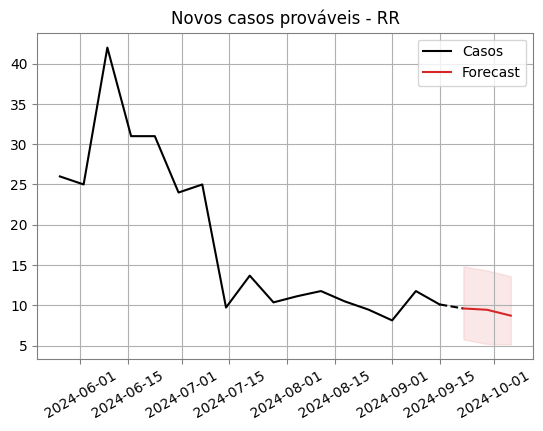

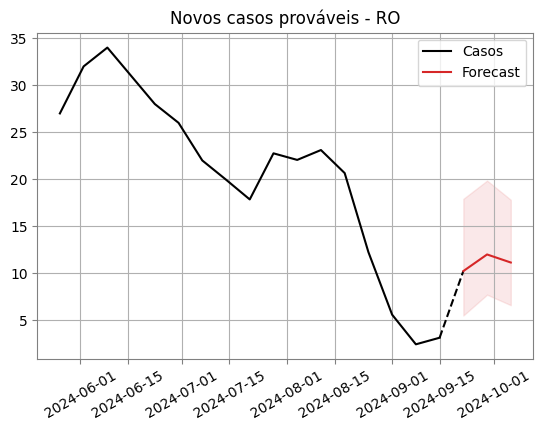

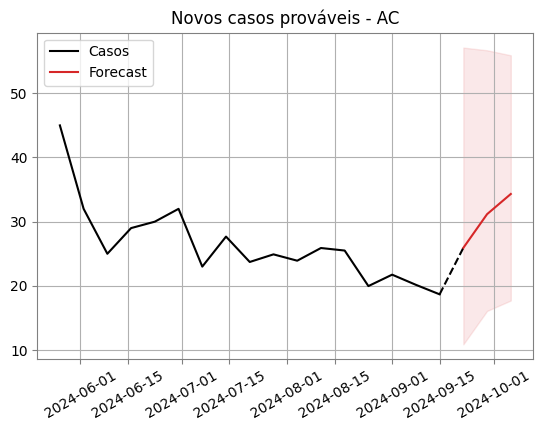

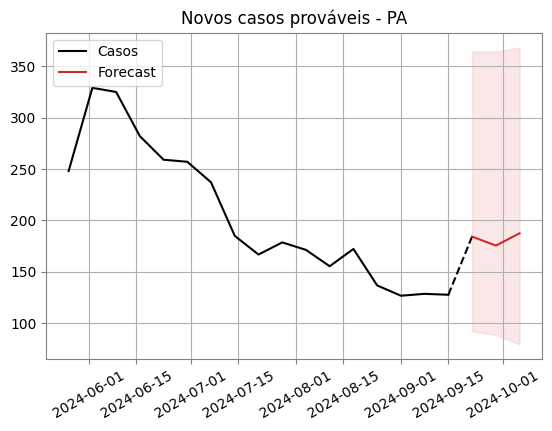

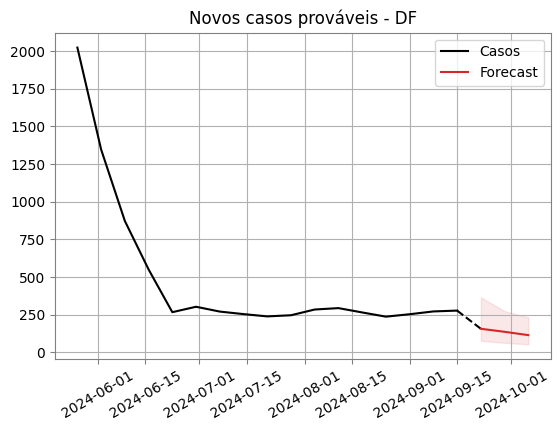

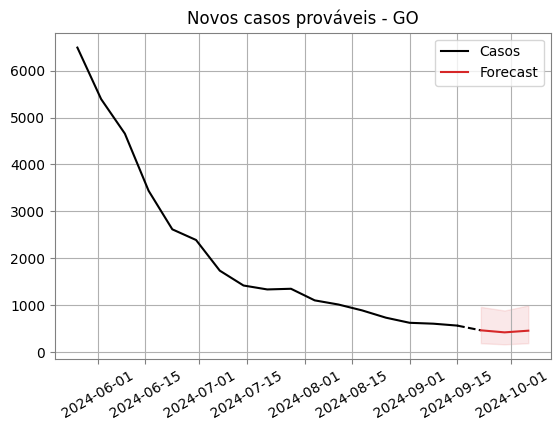

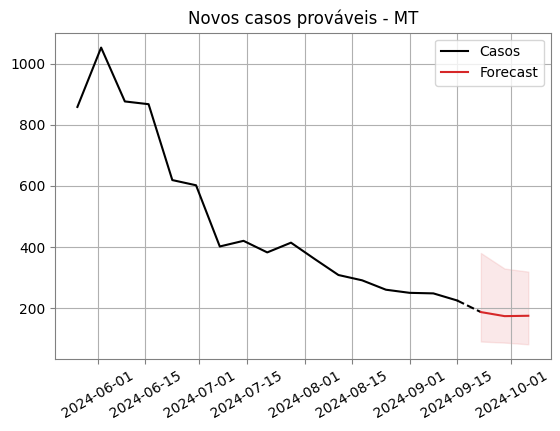

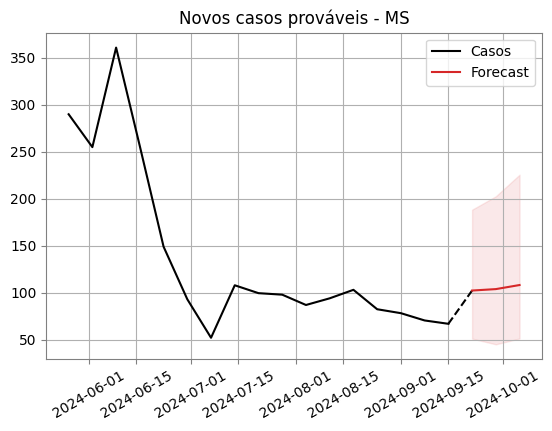

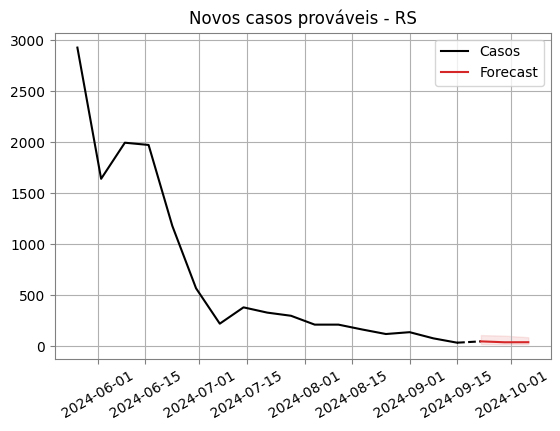

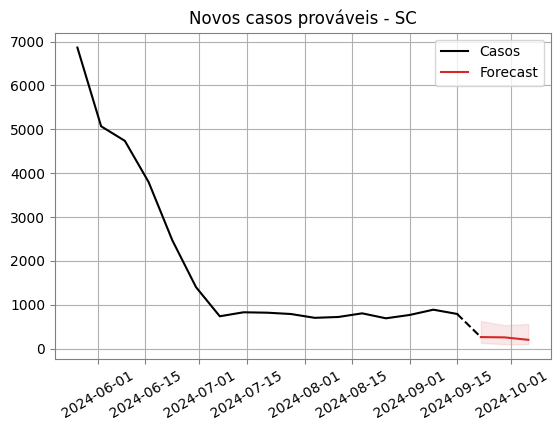

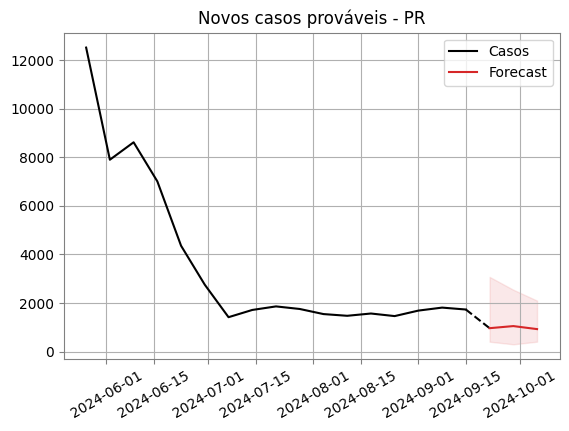

In [15]:
for state in states: 
    FILENAME_DATA = f'../data/dengue_{state}.csv.gz'
    df_for = pd.read_csv(f'./forecast_tables/for_{state}.csv', index_col ='Unnamed: 0')
    
    df_for.date = pd.to_datetime(df_for.date)
    
    df_for = add_epiweek_label(df_for)
    
    df = pd.read_csv(FILENAME_DATA)
    df.date = pd.to_datetime(df.date)
    df.casos = inv_boxcox(df.casos, 0.05) - 1
    
    df = add_epiweek_label(df)
    
    df_last = df.loc[ (df.epiweek.isin(df_for.epiweek))]
    df_last = df_last.loc[df_last.year == 2023]
    
    fig,ax = plt.subplots()
    
    df_ = df.loc[(df.date >= '2024-05-26')]
    
    ax.plot(df_.date, df_.casos, color = 'black', label = 'Casos')
    
    #ax.plot(df_for.date, df_last.casos, color = 'tab:blue', label = 'Casos 2023')
    ax.plot([df_.date.values[-1], df_for.date.values[0]], [df_['casos'].values[-1], df_for.forecast.values[0]], ls = '--', color = 'black')

    ax.plot(df_for.date,  df_for.forecast, color = 'tab:red', label = 'Forecast')
    
    ax.fill_between(df_for.date, df_for.lower_2_5, df_for.upper_97_5, color = 'tab:red', alpha = 0.1)
    
    ax.legend()
    ax.grid()
    fig.autofmt_xdate(rotation=30, ha='center')
    ax.set_title(f'Novos casos prováveis - {state}')
    
    plt.savefig(f'./plots/for_with_{state}.png', dpi = 300, bbox_inches = 'tight')
    
    plt.show()